In [1]:
#CS989 COURSEWORK
#CHAPTER 2 OF COURSEWORK
#DATASET // ANALYSIS

#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the data set and read it
breastcancer = pd.read_csv("breast-cancer.data")
#breastcancer.head(10)

In [3]:
#to see how many observations and columns are
breastcancer.shape

(286, 10)

In [4]:
#print the names of all of the columns
breastcancer.columns.tolist()

['class',
 'age',
 'menopause',
 'tumor-size',
 'invasive-nodes',
 'node-caps',
 'degree-of-malignancy',
 'breast',
 'breast-quadrants',
 'irradiated']

In [5]:
#how many different elements are in each column
breastcancer.apply(lambda age: age.nunique())

class                    2
age                      6
menopause                3
tumor-size              11
invasive-nodes           7
node-caps                3
degree-of-malignancy     3
breast                   2
breast-quadrants         6
irradiated               2
dtype: int64

In [6]:
#checking for missing values
breastcancer.isnull().sum()

class                   0
age                     0
menopause               0
tumor-size              0
invasive-nodes          0
node-caps               0
degree-of-malignancy    0
breast                  0
breast-quadrants        0
irradiated              0
dtype: int64

In [7]:
#to find the type of each column
breastcancer.dtypes

class                   object
age                     object
menopause               object
tumor-size              object
invasive-nodes          object
node-caps               object
degree-of-malignancy     int64
breast                  object
breast-quadrants        object
irradiated              object
dtype: object

In [8]:
#to have easier calculations of the data set, we will categorize the elements in order to have only integer values

#Category 1='no-recurrence-events'
#Category 2='recurrence-events'
breastcancer['class']=breastcancer['class'].replace('no-recurrence-events', 1).replace('recurrence-events', 2)

#replace the age range column
#Category 1='20-29'
#Category 2='30-39'
#Category 3='40-49'
#Category 4='50-59'
#Category 5='60-69'
#Category 6='70-79'
breastcancer['age']=breastcancer['age'].replace('20-29', 1).replace('30-39', 2).replace('40-49', 3).replace('50-59', 4).replace('60-69', 5).replace('70-79', 6)

#replace the menopause column
#Category 1='premeno'
#Category 2='ge40'
#Category 3='lt40'
breastcancer['menopause']=breastcancer['menopause'].replace('premeno', 1).replace('ge40', 2).replace('lt40', 3)

#replace the tumor-size range column
#Category 1='0-4'
#Category 2='5-9'
#Category 3='10-14'
#Category 4='15-19'
#Category 5='20-24'
#Category 6='25-29'
#Category 7='30-34'
#Category 8='35-39'
#Category 9='40-44'
#Category 10='45-49'
#Category 11='50-54'
breastcancer['tumor-size']=breastcancer['tumor-size'].replace('0-4', 1).replace('5-9', 2).replace('10-14', 3).replace('15-19', 4).replace('20-24', 5).replace('25-29', 6).replace('30-34', 7).replace('35-39', 8).replace('40-44', 9).replace('45-49', 10).replace('50-54', 11)

#replace the invasive-nodes range column
#Category 1='0-2'
#Category 2='3-5'
#Category 3='6-8'
#Category 4='9-11'
#Category 5='12-14'
#Category 6='15-17'
#Category 7='24-26'
breastcancer['invasive-nodes']=breastcancer['invasive-nodes'].replace('0-2', 1).replace('3-5', 2).replace('6-8', 3).replace('9-11', 4).replace('12-14', 5).replace('15-17', 6).replace('24-26', 7)

#replace the node-caps column
#Category 1='no'
#Category 2='yes'
breastcancer['node-caps']=breastcancer['node-caps'].replace('no', 1).replace('yes', 2)

#replace the breast column
#Category 1='left'
#Category 2='right'
breastcancer['breast']=breastcancer['breast'].replace('left', 1).replace('right', 2)

#replace the breast-quadrants column
#Category 1='left_low'
#Category 2='right_up'
#Category 3='left_up'
#Category 4='right_low'
#Category 5='central'
breastcancer['breast-quadrants']=breastcancer['breast-quadrants'].replace('left_low', 1).replace('right_up', 2).replace('left_up', 3).replace('right_low', 4).replace('central', 5)

#replace the irradiated column
#Category 1='no'
#Category 2='yes'
breastcancer['irradiated']=breastcancer['irradiated'].replace('no', 1).replace('yes', 2)

In [9]:
#confirming if all the dataset contains integer values
breastcancer.dtypes

class                    int64
age                      int64
menopause                int64
tumor-size               int64
invasive-nodes           int64
node-caps               object
degree-of-malignancy     int64
breast                   int64
breast-quadrants        object
irradiated               int64
dtype: object

In [10]:
#looking that the node-caps and the breast-qudrants are not integer values
breastcancer['node-caps'].tolist()
breastcancer['breast-quadrants'].tolist()
#the columns have some missing values, described with the ? symbol
#removing the rows that contain the ? symbol from all the dataset
breastcancer = breastcancer[(breastcancer != '?').all(axis=1)]

/Users/rafaellayerolemou/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
breastcancer['node-caps']=breastcancer['node-caps'].astype(str).astype('int64')
breastcancer['breast-quadrants']=breastcancer['breast-quadrants'].astype(str).astype('int64')

In [12]:
breastcancer.dtypes

class                   int64
age                     int64
menopause               int64
tumor-size              int64
invasive-nodes          int64
node-caps               int64
degree-of-malignancy    int64
breast                  int64
breast-quadrants        int64
irradiated              int64
dtype: object

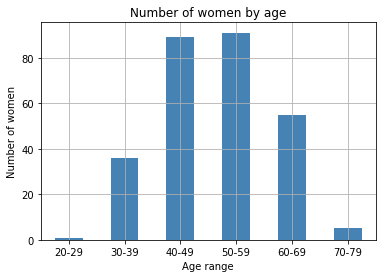

age
1     1
2    36
3    89
4    91
5    55
6     5
dtype: int64


In [13]:
#bar chart showing the number of women with breast cancer by age
breastcancer['age'].value_counts().sort_index().plot.bar(color='steelblue')
plt.title('Number of women by age')
plt.ylabel('Number of women')
plt.xlabel('Age range')
plt.grid(True)
#replacing the X-labels with the age range
plt.xticks([0,1,2,3,4,5],["20-29","30-39","40-49","50-59","60-69","70-79"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.savefig('Fig2.1.png')
plt.show()
#printing number of women in each age range
print(breastcancer.groupby(['age']).size())

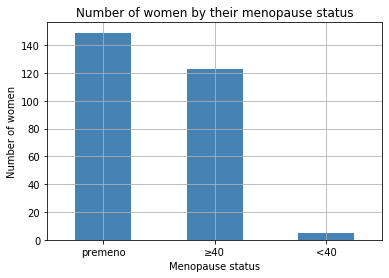

menopause
1    149
2    123
3      5
dtype: int64


In [14]:
#bar chart showing the three different categories of the menopause for each case
breastcancer['menopause'].value_counts().plot.bar(color='steelblue')
plt.title('Number of women by their menopause status')
plt.ylabel('Number of women')
plt.xlabel('Menopause status')
plt.grid(True)
plt.xticks([0,1,2], ["premeno", "≥40", "<40"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.savefig('fig2.2.png')
plt.show()
#printing number of women in each menopause stage
print(breastcancer.groupby(['menopause']).size())

In [15]:
#creating a new dataframe, containing the tumor-size, the invasive-nodes, the node-caps and the degree-of-malignancy columns
data = {'tumor-size':breastcancer['tumor-size'],
        'invasive-nodes':breastcancer['invasive-nodes'],
        'node-caps':breastcancer['node-caps'],
        'degree-of-malignancy':breastcancer['degree-of-malignancy']}
df_breastcancer = pd.DataFrame(data, columns=['tumor-size','invasive-nodes','node-caps','degree-of-malignancy'])
#print(df_breastcancer)

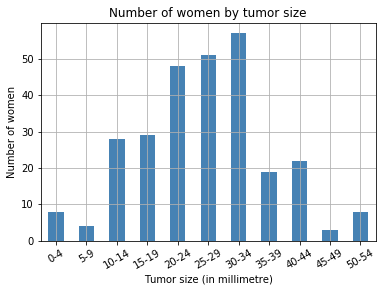

tumor-size
1      8
2      4
3     28
4     29
5     48
6     51
7     57
8     19
9     22
10     3
11     8
dtype: int64


In [16]:
#bar chart showing the number of women affected by the tumor size
breastcancer['tumor-size'].value_counts().sort_index().plot.bar(color='steelblue')
plt.title('Number of women by tumor size')
plt.ylabel('Number of women')
plt.xlabel('Tumor size (in millimetre)')
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],
           ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('fig2.3.png')
plt.show()
#printing number of women in each menopause stage
print(breastcancer.groupby(['tumor-size']).size())

In [17]:
df_breastcancer.head()

,tumor-size,invasive-nodes,node-caps,degree-of-malignancy
0,7,1,1,3
1,5,1,1,2
2,5,1,1,2
3,4,1,1,2
4,1,1,1,2


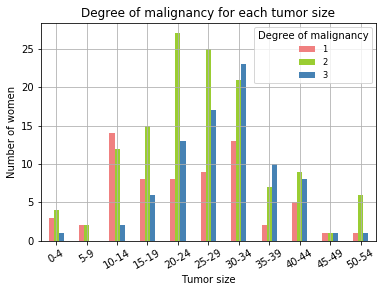

tumor-size  degree-of-malignancy
1           1                        3
            2                        4
            3                        1
2           1                        2
            2                        2
3           1                       14
            2                       12
            3                        2
4           1                        8
            2                       15
            3                        6
5           1                        8
            2                       27
            3                       13
6           1                        9
            2                       25
            3                       17
7           1                       13
            2                       21
            3                       23
8           1                        2
            2                        7
            3                       10
9           1                        5
            2                  

In [18]:
#stacked plot showing the degree of malignancy in each tumor size
df_breastcancer.groupby(['tumor-size','degree-of-malignancy']).size().unstack().plot(kind='bar', color=['lightcoral','yellowgreen','steelblue'])
plt.title('Degree of malignancy for each tumor size')
plt.ylabel('Number of women')
plt.xlabel('Tumor size')
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],
           ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(title="Degree of malignancy", fontsize='small', fancybox=True)
plt.savefig('Fig2.4.png')
plt.show()
#printing the degree of malignancy in each tumor size
print(breastcancer.groupby(['tumor-size','degree-of-malignancy']).size())

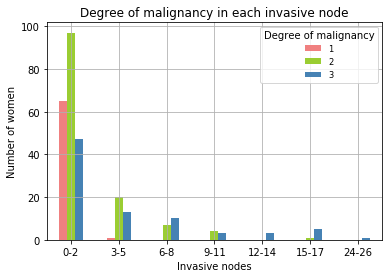

invasive-nodes  degree-of-malignancy
1               1                       65
                2                       97
                3                       47
2               1                        1
                2                       20
                3                       13
3               2                        7
                3                       10
4               2                        4
                3                        3
5               3                        3
6               2                        1
                3                        5
7               3                        1
dtype: int64


In [19]:
#stacked plot showing the degree of malignancy in each invasive node
df_breastcancer.groupby(['invasive-nodes','degree-of-malignancy']).size().unstack().plot(kind='bar', color=['lightcoral','yellowgreen','steelblue'])
plt.title('Degree of malignancy in each invasive node')
plt.ylabel('Number of women')
plt.xlabel('Invasive nodes')
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6],
          ["0-2","3-5","6-8","9-11","12-14","15-17","24-26"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.legend(title='Degree of malignancy',fontsize='small', fancybox=True)
plt.savefig('Fig2.5.png')
plt.show()

print(breastcancer.groupby(['invasive-nodes','degree-of-malignancy']).size())

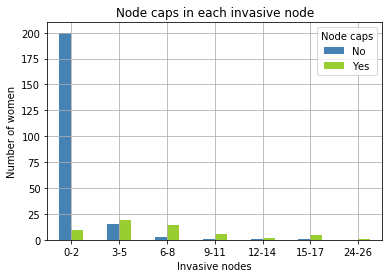

invasive-nodes  node-caps
1               1            200
                2              9
2               1             15
                2             19
3               1              3
                2             14
4               1              1
                2              6
5               1              1
                2              2
6               1              1
                2              5
7               2              1
dtype: int64


In [20]:
#stacked plot showing if there are node caps in each invasive node
df_breastcancer.groupby(['invasive-nodes','node-caps']).size().unstack().plot(kind='bar', color=['steelblue','yellowgreen'])
plt.title('Node caps in each invasive node')
plt.ylabel('Number of women')
plt.xlabel('Invasive nodes')
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6],
          ["0-2","3-5","6-8","9-11","12-14","15-17","24-26"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.legend(fontsize='large', fancybox=True)
plt.legend(["No","Yes"], title="Node caps")
plt.savefig('Fig2.6.png')
plt.show()
#printing the number of each case
print(breastcancer.groupby(['invasive-nodes','node-caps']).size())

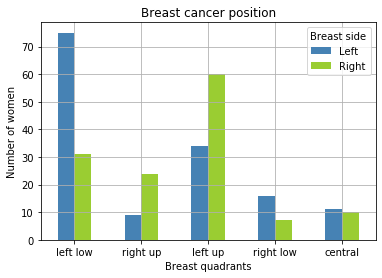

breast-quadrants  breast
1                 1         75
                  2         31
2                 1          9
                  2         24
3                 1         34
                  2         60
4                 1         16
                  2          7
5                 1         11
                  2         10
dtype: int64


In [21]:
#stacked plot showing the most common position of the breast cancer
breastcancer.groupby(['breast-quadrants','breast']).size().unstack().plot(kind='bar', color=['steelblue','yellowgreen'])
plt.title('Breast cancer position')
plt.ylabel('Number of women')
plt.xlabel('Breast quadrants')
plt.grid(True)
plt.xticks([0,1,2,3,4],
          ["left low","right up","left up","right low","central"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.legend(fontsize='small', fancybox=True)
plt.legend(["Left","Right"], title="Breast side")
plt.savefig('Fig2.7.png')
plt.show()
#printing the number of each quadrant
print(breastcancer.groupby(['breast-quadrants','breast']).size())

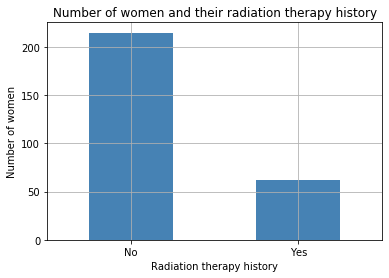

irradiated
1    215
2     62
dtype: int64


In [22]:
#plot bar showing the number of women whether had a radiation therapy history
breastcancer['irradiated'].value_counts().sort_index().plot.bar(color='steelblue')
plt.title('Number of women and their radiation therapy history')
plt.ylabel('Number of women')
plt.xlabel('Radiation therapy history')
plt.grid(True)
plt.xticks([0,1], ["No", "Yes"])
plt.xticks(rotation=360, horizontalalignment="center")
plt.savefig('Fig2.8.png')
plt.show()
#printing the number of each condition
print(breastcancer.groupby(['irradiated']).size())

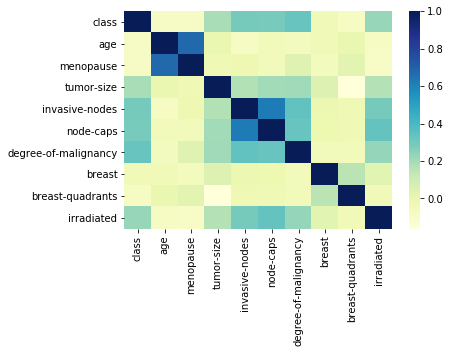

In [23]:
#heatmap showing the correlation between the whole data values
corr = breastcancer.corr()
sns.heatmap(corr, cmap='YlGnBu')
plt.savefig('Fig2.9.png')
plt.show()

In [24]:
#CHAPTER 3 OF COURSEWORK
#3 UNSUPERVISED ANALYSIS

#import the necessary libraries
from sklearn import cluster 
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

In [25]:
#breastcancer VS. breastcancer.values
breastcancer

,class,age,menopause,tumor-size,invasive-nodes,node-caps,degree-of-malignancy,breast,breast-quadrants,irradiated
0,1,2,1,7,1,1,3,1,1,1
1,1,3,1,5,1,1,2,2,2,1
2,1,3,1,5,1,1,2,1,1,1
3,1,5,2,4,1,1,2,2,3,1
4,1,3,1,1,1,1,2,2,4,1
...,...,...,...,...,...,...,...,...,...,...
281,2,2,1,7,1,1,2,1,3,1
282,2,2,1,5,1,1,3,1,3,2
283,2,5,2,5,1,1,1,2,3,1
284,2,3,2,7,2,1,3,1,1,1


In [26]:
#segment the outcome and the remaining data to use the attributes for clustering
X = breastcancer.values[:,1:5]
Y = breastcancer.values[:,0]

#printing the X and Y
#print(X)
#print(Y)

In [27]:
#scale the data that we are going to use for the clustering
scaled_breast = scale(X)
scaled_breast

array([[-1.6290778 , -0.89827964,  0.52576065, -0.45228071],
       [-0.63730956, -0.89827964, -0.41382451, -0.45228071],
       [-0.63730956, -0.89827964, -0.41382451, -0.45228071],
       ...,
       [ 1.34622693,  0.97257344, -0.41382451, -0.45228071],
       [-0.63730956,  0.97257344,  0.52576065,  0.46218467],
       [ 0.35445869,  0.97257344,  0.52576065,  0.46218467]])

In [28]:
#data VS. breast_data
#data
X = np.array(X,dtype=np.float64)
print("scaled_breast")
print("mean=",scaled_breast.mean(axis=0))
print("std=",scaled_breast.std(axis=0))
print("min=",scaled_breast.min(axis=0))
print("max=",scaled_breast.max(axis=0))

#breast_data
print("Not scaled_breast")
print("mean=",X.mean(axis=0))
print("std=",X.std(axis=0))
print("min=",X.min(axis=0))
print("max=",X.max(axis=0))

scaled_breast
mean= [ 1.60321014e-16  9.61926086e-17 -3.84770435e-17  1.02605449e-16]
std= [1. 1. 1. 1.]
min= [-2.62084604 -0.89827964 -2.29299483 -0.45228071]
max= [2.33799517 2.84342652 2.40493097 5.03451154]
Not scaled_breast
mean= [3.64259928 1.4801444  5.88086643 1.49458484]
std= [1.00830008 0.53451552 2.12859896 1.09353512]
min= [1. 1. 1. 1.]
max= [ 6.  3. 11.  7.]


In [41]:
#selecting the number of clusters
n_samples, n_features = scaled_breast.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
result = []
for a in aff:
    for l in link:
      for i in range(2,5):
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=i, linkage=l, affinity=a)
            model.fit(scaled_breast)
            result.append([a,l,i,metrics.silhouette_score(scaled_breast, model.labels_),metrics.completeness_score(Y2, model.labels_),metrics.homogeneity_score(Y2, model.labels_)])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][3]>maxV):
    maxV = result[i][3]
    maxI = i
print("Max silhouette_score: ", result[maxI])

Max silhouette_score:  ['euclidean', 'complete', 2, 0.46880138992192716, 0.049201183280958516, 0.012648191237977401]


In [31]:
print(df1)

                    Silhouette  Completeness  Homogeneity
euclidean ward        0.379840      0.004618     0.005249
euclidean complete    0.468801      0.049201     0.012648
euclidean average     0.433739      0.066262     0.024207
manhattan complete    0.433739      0.066262     0.024207
manhattan average     0.464489      0.005369     0.000803
cosine complete       0.366656      0.010808     0.012200
cosine average        0.386335      0.003619     0.004134


In [37]:
aff

['euclidean', 'manhattan', 'cosine']

In [45]:
scores1

{'euclidean ward': [0.37984016601053333,
  0.004617671436278621,
  0.005248603472035136],
 'euclidean complete': [0.46880138992192716,
  0.049201183280958516,
  0.012648191237977401],
 'euclidean average': [0.43373887194299776,
  0.06626157145769652,
  0.02420666142127818],
 'manhattan complete': [0.43373887194299776,
  0.06626157145769652,
  0.02420666142127818],
 'manhattan average': [0.46448910449923164,
  0.005368531615431542,
  0.0008026722702258],
 'cosine complete': [0.3666564694795495,
  0.010807929888750909,
  0.012200263213479702],
 'cosine average': [0.38633549897641384,
  0.0036191320889419954,
  0.004133985414391853]}

                    Silhouette  Completeness  Homogeneity
euclidean ward        0.379840      0.004618     0.005249
euclidean complete    0.468801      0.049201     0.012648
euclidean average     0.433739      0.066262     0.024207
manhattan complete    0.433739      0.066262     0.024207
manhattan average     0.464489      0.005369     0.000803
cosine complete       0.366656      0.010808     0.012200
cosine average        0.386335      0.003619     0.004134


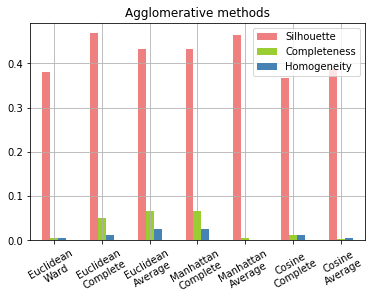

In [30]:
#3 UNSUPERVISED ANALYSIS - CLUSTERING // AGGLOMERATIVE CLUSTERING
#FIGURE SHOWING THE AGGLOMERATIVE METHODS

n_samples, n_features = scaled_breast.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
scores1={} 
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_breast)
            
            col1=metrics.silhouette_score(scaled_breast, model.labels_)
            col2=metrics.completeness_score(Y2, model.labels_)
            col3=metrics.homogeneity_score(Y2, model.labels_)
            
            scores1['{} {}'.format(a,l)]=[col1,col2,col3]

#creating a dataframe to contain the values for each score
df1 = pd.DataFrame.from_dict(scores1, orient='index')
df1 = df1.rename(columns={0:'Silhouette',1:'Completeness',2:'Homogeneity'})
print(df1)

from matplotlib.ticker import FormatStrFormatter

#creating the stacked plot

figure = df1[['Silhouette','Completeness','Homogeneity']].plot(kind="bar", color=['lightcoral','yellowgreen','steelblue'])

plt.title("Agglomerative methods")
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6],["Euclidean\nWard","Euclidean\nComplete","Euclidean\nAverage","Manhattan\nComplete","Manhattan\nAverage","Cosine\nComplete","Cosine\nAverage"])
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('Fig3.1.png')
plt.show()

   Silhouette  Completeness  Homogeneity
2    0.386335      0.003619     0.004134
3    0.413947      0.030389     0.046178
4    0.379467      0.026207     0.051326


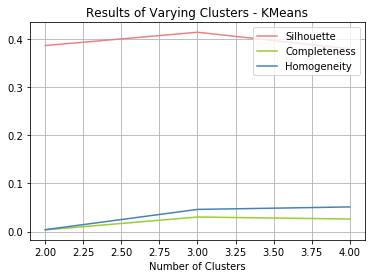

In [301]:
#3 UNSUPERVISED ANALYSIS - CLUSTERING // KMEANS CLUSTERING
#finding the silhouette score, homogeneity and completeness for the different numbers of clusters created using kmeans
#K-MEANS cluster
n_samples, n_features = scaled_breast.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
scores2={}
for k in range(2, 5):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_breast)
    col1 = metrics.silhouette_score(scaled_breast, kmeans.labels_)
    col2 = metrics.completeness_score(Y2, kmeans.labels_)
    col3 = metrics.homogeneity_score(Y2, kmeans.labels_)
    
    scores2[k] = [col1,col2,col3]

df2 = pd.DataFrame.from_dict(scores2, orient='index')
df2 = df2.rename(columns={0:'Silhouette',1:'Completeness',2:'Homogeneity'})
print(df2)

plt.plot(df2['Silhouette'], label="Silhouette", color='lightcoral')
plt.plot(df2['Completeness'], label="Completeness", color='yellowgreen')
plt.plot(df2['Homogeneity'], label="Homogeneity", color='steelblue')
plt.title('Results of Varying Clusters - KMeans')
plt.xlabel('Number of Clusters')
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig('Fig3.2.png')
plt.show()

In [302]:
#the best combination
len(np.unique(Y))

2

In [303]:
#CHAPTER 4 OF COURSEWORK
# SUPERVISED ANALYSIS

#segment the outcome and the remaining data to use the attributes for clustering
breastData = breastcancer.values[:,1:]
breastTarget = breastcancer.values[:,0]

In [304]:
#segment the data in a training and test set with a 70/30 split/observations
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(breastData, breastTarget, test_size=0.30)

#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

In [305]:
#using Naive Bayes classifier
#model generation
from sklearn.naive_bayes import GaussianNB

print("\n\n Naive Bayes")
print("**************************************")

#creating a Gaussian classifier
model = GaussianNB()

#training the model using the training sets
model.fit(X_train, Y_train)
#print(model)

#predict the response for test dataset
y_predicted = model.predict(X_test)
#print(y_predicted)

print("\nClassification Report:\n", metrics.classification_report(Y_test, y_predicted))
print('\nConfussion matrix:\n', metrics.confusion_matrix(Y_test, y_predicted))

#estimating the error//accuracy
acc = model.score(X_test,Y_test)
print("Accuracy Score=", round(acc)*100, "%")

#print the predicted vs actual values
for i in zip(Y_test, y_predicted):
    print("Actual was:", i[0], "Predicted was:", i[1])




 Naive Bayes
**************************************

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        62
           2       0.62      0.45      0.53        22

    accuracy                           0.79        84
   macro avg       0.72      0.68      0.69        84
weighted avg       0.77      0.79      0.77        84


Confussion matrix:
 [[56  6]
 [12 10]]
Accuracy Score= 100.0 %
Actual was: 2 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 2 Predicted was: 2
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 2 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 2
Actual was: 1 Predicted was: 2
Actual was: 1 Predicted was: 1
Actual was: 1 Predicted was: 1
Actual was: 2 Predicted was: 1
Act

In [293]:
#checking the python version
from platform import python_version
print(python_version())

3.7.6
